In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [22]:
eps = 1/100

In [3]:
A = np.array([[0, 1, 1, 1],
             [-1, 0, 1, 1],
             [-1, -1, 0, 1],
             [-1, -1, -1, 0]])

In [4]:
S = np.diag([eps]*A.shape[0])

In [5]:
def get_losses(x,eps):
    return np.array([x[0]*simult(x,eps)[0],
                     x[1] * simult(x,eps)[1],
                     x[2] * simult(x,eps)[2],
                     x[3] * simult(x,eps)[3]])

In [6]:
def simult(x,eps):
    return np.array([x[1:].sum()+eps*x[0], x[2:].sum() - x[0] + eps*x[1], x[-1] - x[:2].sum() + eps*x[2], -x[:-1].sum() + eps*x[-1]])

In [7]:
def has_converged(losses):
    last_losses = np.array(losses[-10:])
    for i in range(x.shape[0]):
        cur_mean = last_losses[:, i].mean()
        if cur_mean > 0.1:
            return False
    return True

### Comparison of converges of SGA and OMD for  4-player game. Experiment from appendix.

### Optimistic mirror descent (criteria of convergence from papper)

In [36]:
x = np.random.normal(size=4)
print(x)

[-0.79728239  0.06161539 -0.01203284 -0.76114275]


Converged early at iteration 14


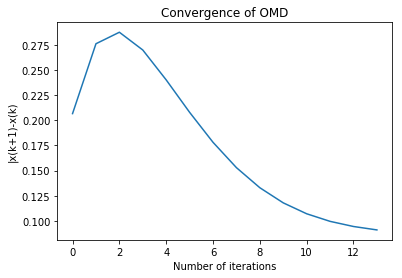

In [37]:
iters = 100000
lr = 0.2
diffs = []
losses = []
previous_gradient = simult(x,eps)
for it in range(iters):
    gradient = simult(x,eps)
    x_new = x + 2* lr * gradient - lr * previous_gradient
    diff = np.linalg.norm(x_new - x)
    diffs.append(diff)
    previous_gradient = gradient
    losses.append(get_losses(x,eps))
    x = x_new
    if has_converged(losses):
        print(f'Converged early at iteration {it+1}')
        break

plt.title('Convergence of OMD')
plt.ylabel('|x(k+1)-x(k)')
plt.xlabel('Number of iterations')
plt.plot(diffs)

# SGA with convergence criterion

In [38]:
x = np.random.normal(size=4)
print(x)

[-0.68111806  0.09578173  2.06330902 -0.97562929]


In [39]:
iters = 10000
lr = 0.032
diffs = []
losses = []
for it in range(iters):
    grad_new = (S+A.T) @ simult(x,eps)
    x_new = x - lr * grad_new
    diff = np.linalg.norm(x_new - x)
    diffs.append(diff)
    losses.append(get_losses(x,eps))
    x = x_new
    if has_converged(losses):
        print(f'Converged early at iteration {it+1}')
        break

Converged early at iteration 135


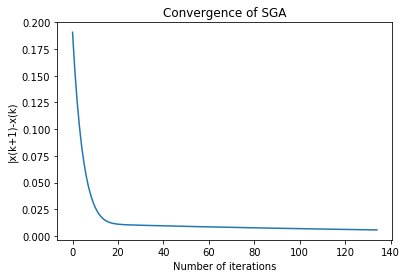

In [40]:
plt.title('Convergence of SGA')
plt.ylabel('|x(k+1)-x(k)')
plt.xlabel('Number of iterations')
plt.plot(diffs)

### Dependency of time to convergence on learning rates for SGA and OMD

#### 1.Weakly positive definite $S$ with $\epsilon = \frac{1}{100}$

In [13]:
results = []
for lr in np.arange(0.005, 0.25, 0.001):
    print(lr)
    cur_results = []
    for i in range(50):
        x = np.random.normal(size=4)
        iters = 100000  # maximum number of iterations
        losses = []
        for it in range(iters):
            grad_new = (S + A.T) @ simult(x,eps)
            x_new = x - lr * grad_new
            losses.append(get_losses(x,eps))
            x = x_new
            if has_converged(losses):
                break
        cur_results.append(it+1)
    cur_results = np.array(cur_results)
    results.append(cur_results.mean())

0.005
0.006
0.007
0.008
0.009000000000000001
0.01
0.011
0.012
0.013000000000000001
0.014000000000000002
0.015
0.016
0.017
0.018000000000000002
0.019
0.02
0.021
0.022000000000000002
0.023000000000000003
0.024
0.025
0.026000000000000002
0.027
0.028
0.029
0.030000000000000002
0.031000000000000003
0.032
0.033
0.034
0.034999999999999996
0.036
0.037
0.038
0.039
0.04
0.041
0.041999999999999996
0.043
0.044
0.045
0.046
0.047
0.048
0.048999999999999995
0.049999999999999996
0.051
0.052
0.053
0.054
0.055
0.056
0.057
0.057999999999999996
0.059
0.06
0.061
0.062
0.063
0.064
0.065
0.066
0.067
0.068
0.069
0.07
0.07100000000000001
0.07200000000000001
0.07300000000000001
0.07400000000000001
0.07500000000000001
0.07600000000000001
0.07700000000000001
0.078
0.079
0.08
0.081
0.082
0.083
0.084
0.085
0.08600000000000001
0.08700000000000001
0.08800000000000001
0.08900000000000001
0.09000000000000001
0.09100000000000001
0.09200000000000001
0.093
0.094
0.095
0.096
0.097
0.098
0.099
0.1
0.101
0.10200000000000001


In [14]:
results1 = []
for lr in np.arange(0.005, 0.25, 0.005):
    print(lr)
    cur_results = []
    for i in range(50):
        x = np.random.normal(size=4)
        iters = 10000  # maximum number of iterations
        losses = []
        previous_gradient = 0
        for it in range(iters):
            gradient = simult(x,eps)
            x_new = x + 2* lr * gradient - lr * previous_gradient
            losses.append(get_losses(x,eps))
            previous_gradient = gradient
            x = x_new
            if has_converged(losses):
                break
        cur_results.append(it+1)
    cur_results = np.array(cur_results)
    results1.append(cur_results.mean())

0.005
0.01
0.015
0.02
0.025
0.030000000000000002
0.034999999999999996
0.04
0.045
0.049999999999999996
0.055
0.06
0.065
0.07
0.07500000000000001
0.08
0.085
0.09000000000000001
0.095
0.1
0.10500000000000001
0.11
0.115
0.12000000000000001
0.125
0.13
0.135
0.14
0.14500000000000002
0.15
0.155
0.16
0.165
0.17
0.17500000000000002
0.18000000000000002
0.185
0.19
0.195
0.2
0.20500000000000002
0.21000000000000002
0.215
0.22
0.225
0.23
0.23500000000000001
0.24000000000000002
0.245


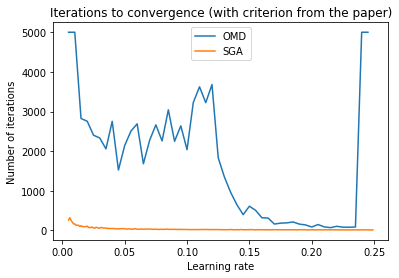

In [16]:
for i in range(len(results1)):
    if results1[i]>5000:
        results1[i] = 5000

plt.plot(np.arange(0.005, 0.25, 0.005),results1, label = 'OMD')
plt.plot(np.arange(0.005, 0.25, 0.001),results, label = 'SGA')
plt.title('Iterations to convergence (with criterion from the paper)')
plt.xlabel('Learning rate')
plt.ylabel('Number of iterations')
plt.legend()

#### Symmetric component $S$ is identically zero.

In [17]:
results0 = []
eps = 0
S = np.diag([eps]*A.shape[0])
for lr in np.arange(0.005, 0.25, 0.005):
    print(lr)
    cur_results = []
    for i in range(50):
        x = np.random.normal(size=4)
        iters = 10000  # maximum number of iterations
        losses = []
        for it in range(iters):
            grad_new = (S + A.T) @ simult(x,eps)
            x_new = x - lr * grad_new
            losses.append(get_losses(x,eps))
            x = x_new
            if has_converged(losses):
                break
        cur_results.append(it+1)
    cur_results = np.array(cur_results)
    results0.append(cur_results.mean())

0.005
0.01
0.015
0.02
0.025
0.030000000000000002
0.034999999999999996
0.04
0.045
0.049999999999999996
0.055
0.06
0.065
0.07
0.07500000000000001
0.08
0.085
0.09000000000000001
0.095
0.1
0.10500000000000001
0.11
0.115
0.12000000000000001
0.125
0.13
0.135
0.14
0.14500000000000002
0.15
0.155
0.16
0.165
0.17
0.17500000000000002
0.18000000000000002
0.185
0.19
0.195
0.2
0.20500000000000002
0.21000000000000002
0.215
0.22
0.225
0.23
0.23500000000000001
0.24000000000000002
0.245


In [18]:
results2 = []
for lr in np.arange(0.005, 0.25, 0.005):
    print(lr)
    cur_results = []
    for i in range(50):
        x = np.random.normal(size=4)
        iters = 10000  # maximum number of iterations
        losses = []
        previous_gradient = 0
        for it in range(iters):
            gradient = simult(x,eps)
            x_new = x + 2* lr * gradient - lr * previous_gradient
            losses.append(get_losses(x,eps))
            previous_gradient = gradient
            x = x_new
            if has_converged(losses):
                break
        cur_results.append(it+1)
    cur_results = np.array(cur_results)
    results2.append(cur_results.mean())

0.005
0.01
0.015
0.02
0.025
0.030000000000000002
0.034999999999999996
0.04
0.045
0.049999999999999996
0.055
0.06
0.065
0.07
0.07500000000000001
0.08
0.085
0.09000000000000001
0.095
0.1
0.10500000000000001
0.11
0.115
0.12000000000000001
0.125
0.13
0.135
0.14
0.14500000000000002
0.15
0.155
0.16
0.165
0.17
0.17500000000000002
0.18000000000000002
0.185
0.19
0.195
0.2
0.20500000000000002
0.21000000000000002
0.215
0.22
0.225
0.23
0.23500000000000001
0.24000000000000002
0.245


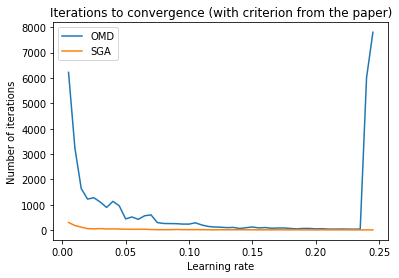

In [41]:
plt.plot(np.arange(0.005, 0.25, 0.005),results2, label = 'OMD')
plt.plot(np.arange(0.005, 0.25, 0.005),results0, label = 'SGA')
plt.title('Iterations to convergence (with criterion from the paper)')
plt.xlabel('Learning rate')
plt.ylabel('Number of iterations')
plt.legend()